In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os.path
import tensorflow as tf
import tensorflow_text as text
import heapq
from collections import defaultdict
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

data_path = '../local_data/'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Oyka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
columns_to_drop = ['url', 'author', 'kind', 'language', 'language_score', 'media_urls', 'date']

def clean(df):
    df = df.drop(columns=columns_to_drop)
    df = df[df['score'] > 10]
    df['text'] = df['text'].str.lower()
    return df

In [15]:
working_df = pd.DataFrame()

In [19]:
df = pd.read_parquet(data_path + '0000.parquet')
cleaned_df = clean(df)
working_df = pd.concat([working_df, cleaned_df])

In [20]:
df = pd.read_parquet(data_path + '0001.parquet')
cleaned_df = clean(df)
working_df = pd.concat([working_df, cleaned_df])

In [21]:

working_df.to_parquet(data_path + 'cleaned_df.parquet')

In [22]:
working_df = pd.read_parquet(data_path + 'cleaned_df.parquet')

In [23]:
working_df.describe()

,score,token_count
count,639895.000000,639895.000000
mean,58.504706,42.768525
std,198.963952,69.876524
min,11.000000,1.000000
25%,15.000000,12.000000
50%,23.000000,23.000000
75%,46.000000,49.000000
max,18967.000000,3462.000000


In [24]:
sample_df = working_df[0:1000000]

print(working_df.describe())

tokenizer = text.UnicodeScriptTokenizer()

tokenized = tokenizer.tokenize(working_df['text']).to_list()

               score    token_count
count  639895.000000  639895.000000
mean       58.504706      42.768525
std       198.963952      69.876524
min        11.000000       1.000000
25%        15.000000      12.000000
50%        23.000000      23.000000
75%        46.000000      49.000000
max     18967.000000    3462.000000


[(35661, 'good'), (38029, 'also'), (42290, 'time'), (54739, 'get'), (38746, 'even'), (43824, 'think'), (55851, 'would'), (59752, 'one'), (56019, 'people'), (95730, 'like')]
(35661, 'good')
(38029, 'also')
(38746, 'even')
(42290, 'time')
(43824, 'think')
(54739, 'get')
(55851, 'would')
(56019, 'people')
(59752, 'one')
(95730, 'like')


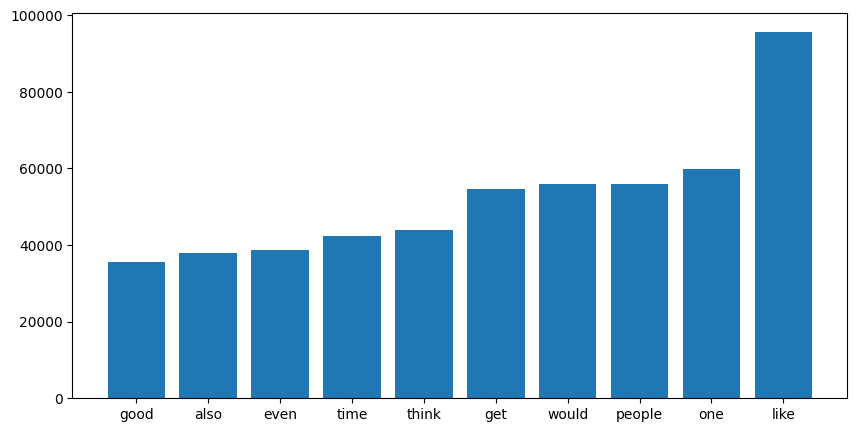

In [25]:
counts = defaultdict(int)

stop_words = set(stopwords.words('english'))

outliers = ['’', 'amp']

for item in tokenized:
    for word in item:
        cur = word.decode('utf-8', errors='ignore')
        if cur in stop_words or cur in string.punctuation or cur in outliers:
            continue
        if cur in counts:
            counts[cur] += 1
        else:
            counts[cur] = 1

min_heap = []

for word, count in counts.items():
    heapq.heappush(min_heap, (count, word))
    if len(min_heap) > 10:
        heapq.heappop(min_heap)

print(min_heap)

min_heap.sort()

for i in range(10):
    print(min_heap[i])

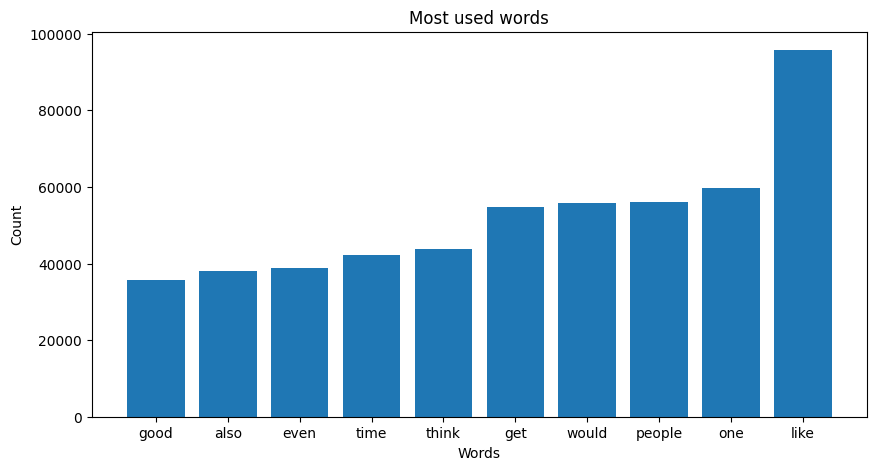

In [26]:
# Draw a bar graph of the most used words
counts, words = zip(*min_heap)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Most used words from a sample of 640k comments')
plt.show()